In [1]:
import keras
import os
import pprint

C:\Users\mattt_000\Anaconda3\envs\keras\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load Model

In [2]:
% ls "model\"

 Volume in drive C is OS
 Volume Serial Number is D4F8-2F03

 Directory of C:\Users\mattt_000\Documents\MachineLearning101\MachineLearning101\NMIST\model

18/08/2019  17:29    <DIR>          .
18/08/2019  17:29    <DIR>          ..
18/08/2019  11:08            78,480 20190818 110820.keras
18/08/2019  11:21            78,480 20190818 112143.keras
18/08/2019  17:29            78,480 20190818 172933.keras
               3 File(s)        235,440 bytes
               2 Dir(s)  30,310,965,248 bytes free


In [3]:
filename = '20190818 172933.keras'
filepath = os.path.join('model',filename)
model = keras.models.load_model(filepath)
print(model.summary())
pprint.pprint(model.get_config())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
{'build_input_shape': [None, 784],
 'layers': [{'class_name': 'Dense',
             'config': {'activation': 'softmax',
                        'activity_regularizer': None,
                        'bias_constraint': None,
                        'bias_initializer': {'class_name': 'Zeros',
                                             'config': {}},
                        'bias_regularizer': None,
                        'kernel_constraint': None,
                        'kernel_initializer': {'class_name': 'VarianceScaling',
           

# Make a prediction

In [4]:
import os
import struct
import numpy as np
import gzip
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte.gz' % kind)
        
    with gzip.open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        images = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return images, labels

In [5]:
X_test, y_test = load_mnist('data/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))
y_test_orig = y_test

Rows: 10000, columns: 784


In [6]:
import random
i = random.randrange(X_test.shape[0])
X = X_test[i]/255

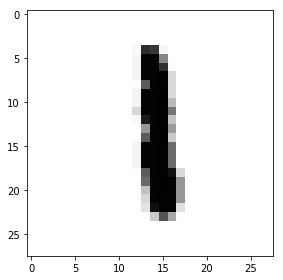

In [7]:
import matplotlib.pyplot as plt

img = X.reshape(28, 28)
plt.imshow(img, cmap='Greys', interpolation='nearest')

plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

In [8]:
#expand dims needed because model.predict expects a a 2D array of shape (num_instances, features)
print(model.predict(np.expand_dims(X, axis=0), verbose=1))
#expand dims needed because model.predict expects a a 2D array of shape (num_instances, features)
print(model.predict_classes(np.expand_dims(X, axis=0), verbose=1))

1/1 [==============================] - 0s 40ms/step
[[4.1263146e-11 9.9888426e-01 2.1175932e-05 9.8319387e-04 3.0028716e-07
  3.8145424e-06 5.8443788e-06 1.3929596e-06 7.7012046e-05 2.2876451e-05]]
1/1 [==============================] - 0s 3ms/step
[1]


# How is the prediction made?

In [9]:
X = X_test[i].copy()

print(f'There are {len(X)} values (pixels) in each image')
print(f'The values range from {min(X)} to {max(X)}. 0 = White, 255 = Blank.')
print(f'The values are divided by 255 to remap them to between 0 and 1')
X /= 255
print(f'The new values range from {min(X)} to {max(X)}. 0 = White, 1 = Blank.')

There are 784 values (pixels) in each image
The values range from 0.0 to 255.0. 0 = White, 255 = Blank.
The values are divided by 255 to remap them to between 0 and 1
The new values range from 0.0 to 1.0. 0 = White, 1 = Blank.


In [10]:
print(f'There are {len(model.layers)} layers in the model')
print(f'The layer configuration is:')
layer = model.layers[0]
pprint.pprint(layer.get_config())

There are 1 layers in the model
The layer configuration is:
{'activation': 'softmax',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
                        'config': {'distribution': 'uniform',
                                   'mode': 'fan_avg',
                                   'scale': 1.0,
                                   'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_2',
 'trainable': True,
 'units': 10,
 'use_bias': True}


In [11]:
print(f'The input for the layer is type {type(layer.input)}. The input shape is {layer.input_shape}')
print(f'The output for the layer is type {type(layer.output)}. The output shape is {layer.output_shape}')


print(f'The shape of the layer weights is {layer.get_weights()[0].shape}. There are {np.product(layer.get_weights()[0].shape)} weights')
print(f'The share of the layer biases is {layer.get_weights()[1].shape} biases')

The input for the layer is type <class 'tensorflow.python.framework.ops.Tensor'>. The input shape is (None, 784)
The output for the layer is type <class 'tensorflow.python.framework.ops.Tensor'>. The output shape is (None, 10)
The shape of the layer weights is (784, 10). There are 7840 weights
The share of the layer biases is (10,) biases


In [12]:
def getConnectionWeight(layer,i_input,i_output):
    return layer.get_weights()[0][i_input][i_output]

i_input = 0
i_output = 0

for i_input in range(2):
    print(f'                  i:o')
    for i_output in range(10):
        #print(f'The weight of the {i_input}:{i_output} connection is {layer.get_weights()[0][i_input][i_output]:{3}.{3}}')
        print(f'The weight of the {i_input}:{i_output} connection is {getConnectionWeight(layer,i_input,i_output):{3}.{3}}')
    print()

                  i:o
The weight of the 0:0 connection is -0.0324
The weight of the 0:1 connection is -0.00806
The weight of the 0:2 connection is -0.0533
The weight of the 0:3 connection is 0.0273
The weight of the 0:4 connection is 0.000802
The weight of the 0:5 connection is -0.00952
The weight of the 0:6 connection is -0.0407
The weight of the 0:7 connection is 0.0476
The weight of the 0:8 connection is -0.0791
The weight of the 0:9 connection is 0.0578

                  i:o
The weight of the 1:0 connection is -0.0342
The weight of the 1:1 connection is -0.0435
The weight of the 1:2 connection is 0.078
The weight of the 1:3 connection is -0.0283
The weight of the 1:4 connection is 0.0351
The weight of the 1:5 connection is 0.0466
The weight of the 1:6 connection is 0.0455
The weight of the 1:7 connection is -0.00786
The weight of the 1:8 connection is 0.0359
The weight of the 1:9 connection is 0.0633



In [13]:
def getConnectionBias(layer,i_output):
    return layer.get_weights()[1][i_output]

for i_output in range(len(layer.get_weights()[1])):
    #print(f'The weight of the {i_input}:{i_output} connection is {layer.get_weights()[0][i_input][i_output]:{3}.{3}}')
    print(f'The weight of the {i_output} output connection is {getConnectionBias(layer,i_output):{3}.{3}}')
print()

The weight of the 0 output connection is -0.367
The weight of the 1 output connection is 0.399
The weight of the 2 output connection is 0.0375
The weight of the 3 output connection is -0.222
The weight of the 4 output connection is 0.024
The weight of the 5 output connection is 0.712
The weight of the 6 output connection is -0.151
The weight of the 7 output connection is 0.412
The weight of the 8 output connection is -0.856
The weight of the 9 output connection is -0.172



In [14]:
print(f'To calculate the Output Value of the top output (0), We take each value of X'
      f', multiply it by the weight, add them up, add the bias, then...?')

To calculate the Output Value of the top output (0), We take each value of X, multiply it by the weight, add them up, add the bias, then...?


In [15]:
output = []

for i_output in range(10):
    print()
    print(f'Output index: {i_output}')

    sum = 0

    for i_input in range(len(X)):
        if i_input < 5:
            print(f'{getConnectionWeight(layer,i_input,i_output):{2}.{2}} x {X[i_input]:{2}.{2}} = '
                  f'{getConnectionWeight(layer,i_input,i_output)*X[i_input]:{3}.{3}}')
        if i_input == 5:
            print('etc...')
        sum += getConnectionWeight(layer,i_input,i_output)*X[i_input]

    print (f'The summation is {sum}')
    print ()
    print (f'The bias is {getConnectionBias(layer,i_output)}')
    print (f' {sum}+{getConnectionBias(layer,i_output)} = {sum+getConnectionBias(layer,i_output)} ')
    
    output.append(sum+getConnectionBias(layer,i_output))


Output index: 0
-0.032 x 0.0 = -0.0
-0.034 x 0.0 = -0.0
0.021 x 0.0 = 0.0
0.015 x 0.0 = 0.0
0.074 x 0.0 = 0.0
etc...
The summation is -18.040252579138713

The bias is -0.3670988082885742
 -18.040252579138713+-0.3670988082885742 = -18.407351387427287 

Output index: 1
-0.0081 x 0.0 = -0.0
-0.043 x 0.0 = -0.0
-0.085 x 0.0 = -0.0
0.043 x 0.0 = 0.0
-0.031 x 0.0 = -0.0
etc...
The summation is 5.1033100463011705

The bias is 0.3992721438407898
 5.1033100463011705+0.3992721438407898 = 5.50258219014196 

Output index: 2
-0.053 x 0.0 = -0.0
0.078 x 0.0 = 0.0
0.0094 x 0.0 = 0.0
-0.049 x 0.0 = -0.0
-0.03 x 0.0 = -0.0
etc...
The summation is -5.296460820005879

The bias is 0.03751373663544655
 -5.296460820005879+0.03751373663544655 = -5.258947083370432 

Output index: 3
0.027 x 0.0 = 0.0
-0.028 x 0.0 = -0.0
-0.004 x 0.0 = -0.0
-0.026 x 0.0 = -0.0
-0.006 x 0.0 = -0.0
etc...
The summation is -1.198832436975128

The bias is -0.22217315435409546
 -1.198832436975128+-0.22217315435409546 = -1.421005591

In [23]:
print (f'Before applying softmax function')
for i in range(len(output)):
    print(f'{i}: {output[i]}')

Before applying softmax function
0: -18.407351387427287
1: 5.50258219014196
2: -5.258947083370432
3: -1.4210055913292234
4: -9.514828544953728
5: -6.972991129206311
6: -6.546332545828655
7: -7.980382214892449
8: -3.9678504679279003
9: -5.181703429946713


In [24]:
print (f'After applying softmax function')
from scipy.special import softmax
m = softmax(output)
for i in range(len(m)):
    print(f'{i}: {m[i]}')

After applying softmax function
0: 4.126321003910641e-11
1: 0.9988843892835515
2: 2.1175927706398372e-05
3: 0.0009831940858416551
4: 3.0028705536346073e-07
5: 3.814543525961272e-06
6: 5.8443745810330685e-06
7: 1.3929585235673376e-06
8: 7.701203177161729e-05
9: 2.2876466179867054e-05


In [22]:
keras_output = model.predict(np.expand_dims(X, axis=0), verbose=1)[0]

for i in range(len(keras_output)):
    print(f'{i}: {keras_output[i]}')

1/1 [==============================] - 0s 995us/step
0: 4.1263145678094304e-11
1: 0.9988842606544495
2: 2.1175932488404214e-05
3: 0.0009831938659772277
4: 3.0028715514163196e-07
5: 3.814542424152023e-06
6: 5.84437884754152e-06
7: 1.392959575241548e-06
8: 7.701204594923183e-05
9: 2.287645111209713e-05
